# Class 4 - Polynomial regression, overfitting, and validation

## Polynomial regression

Recall that in the previous class we have considered linear regression on training data $\displaystyle \{(x_i,y_i)\}_{i=1}^{n}$ in $\displaystyle \mathbb{R}^d \times \mathbb{R}$ by taking the hypothesis class of linear functions $$\{x\mapsto \langle β,x\rangle \;\vert\; β∈ℝ^{d}\},$$  and applying empirical risk minimization to the squared error loss function $$\displaystyle L(y,y')=(y-y')^2.$$

Let us consider $\displaystyle \mathcal{X} = \mathcal{Y} = ℝ$ and look at the following example.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, metrics

## Let us create a random dataset that resembles a cubic polynomial relation.
x = np.linspace(-2, 2, 20)
y = 4* x ** 3 - 4 * x + np.random.normal(0, 4, 20)    # +noise

## We may turn x and y into column vectors by inserting additional axes along the second dimension.
x, y = x[:, np.newaxis] , y[:, np.newaxis]

We prepare our data by splitting and shuffling as before.

In [3]:
def shuffle(x, y):
    z = np.hstack((x, y))
    np.random.shuffle(z)
    return np.hsplit(z, [x.shape[1]])

x, y = shuffle(x, y)

def splitting(x, y, test_size=0.2): ## Train-test split from the previous class.
    n = x.shape[0]
    train_size = int(n * (1 - test_size))
    return x[:train_size, ], x[train_size:, ], y[:train_size, ], y[train_size:, ]

x_train, x_test, y_train, y_test = splitting(x, y)


We can now apply linear regression to our training data.

Linear regression
Mean squared error: 57.17
R2 score: 0.41


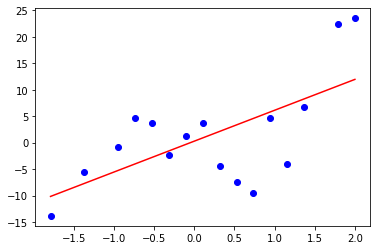

In [4]:
## Apply linear regression using scikit-learn.
linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)
y_pred_train = linreg.predict(x_train)    #predict to see label

print('Linear regression')
## Check the mean squared error and the R2 score.
print('Mean squared error: {:.2f}'.format(metrics.mean_squared_error(y_train,y_pred_train)))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_train,y_pred_train)))

## Plot the data points and the regression line.
plt.plot(x_train, y_train, 'ob' ) 
ordered_data=zip(*sorted(zip(x_train,y_pred_train))) ## Sorting for graphing purposes.
plt.plot(*ordered_data, 'r')
plt.show()

Note that the error is quite large and the linear model is too simple for the given training data. In this case, we say that the model has a **high bias** or that the model **underfits**. (A similar problem might be that our features are not informative enough.)

To search for a more accurate model, we may extend our hypothesis class to the one dimensional, $p$-degree, polynomial regression predictors, namely, $$\mathcal{F} = \{ x \mapsto a_0 + a_1 x + \dots + a_p x^p \; \vert \; a_0, \dots, a_p \in \mathbb{R}  \}. $$ 

This learning problem can be translated to a linear regression problem by defining the mapping $\displaystyle \varphi : \mathbb{R} \to \mathbb{R}^{p+1}$ such that $\displaystyle \varphi(x)=(1,x,x^2,\dots,x^p)$. Then we have $$ a_0 + a_1 x + \dots + a_p x^p = \langle a, \varphi(x) \rangle $$ and we can find the optimal vector of coefficients $a=(a_0, \dots, a_p)$ by using linear regression.

This means that we need to transform our input data to its Vandermonde matrix: 	
$$\begin{bmatrix}	x_1 \\ x_2 \\ \vdots \\ x_{n} \end{bmatrix} \to \begin{bmatrix} 1 & x_1 & x_1^2 & \dots & x_1^p \\ 1 & x_2 & x_2^2 & \dots & x_2^p \\  \vdots & \vdots & \vdots & & \vdots\\ 1 & x_{n} & x_{n}^2 & \dots & x_{n}^p\end{bmatrix}.$$

In [5]:
def extend(x, p): ## Extends the x-values to an array with columns x**0, x**1, ..., x**n.
    x_poly = np.zeros((x.shape[0], p+1))
    for j in range(p+1):
        for i in range(x.shape[0]):
            x_poly[i,j]=x[i,0]**j
    return x_poly

a=np.arange(1,10).reshape(-1,1)
print(extend(a,3))

## We can also use the built-in class from scikit-learn.
from sklearn.preprocessing import PolynomialFeatures

def extend_sci(x, p): 
    poly = PolynomialFeatures(degree = p)
    return poly.fit_transform(x)

print(extend_sci(a,3))

[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]
 [  1.   6.  36. 216.]
 [  1.   7.  49. 343.]
 [  1.   8.  64. 512.]
 [  1.   9.  81. 729.]]
[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]
 [  1.   6.  36. 216.]
 [  1.   7.  49. 343.]
 [  1.   8.  64. 512.]
 [  1.   9.  81. 729.]]


We can then apply linear regression to the extended array.

In [6]:
def lin_reg(x,y): ## Linear regression on the extended array by using scikit-learn. Gradient descent or the normal equation can also be used.
    lin_reg = linear_model.LinearRegression(fit_intercept=False)
    lin_reg.fit(x, y)
    return lin_reg   
  
def regression_visuals(x, y, p): ## Displays the mean squared error and the R2 score, plots the data points and the regression curve.
    print('Polynomial degree =', p)
    print('Mean squared error: {:.2f}'.format(metrics.mean_squared_error(y, lin_reg(extend(x,p),y).predict(extend(x,p)))))
    print('R2 score: {:.2f}'.format(metrics.r2_score(y, lin_reg(extend(x,p),y).predict(extend(x,p)))))
     
    plt.ylim(min(y)-1,max(y)+1)
    plt.plot(x, y, 'ob')
    a = np.linspace(min(x),max(x),num=1000).reshape(-1,1)
    b = extend(a, p).dot(lin_reg(extend(x,p),y).coef_.T)
    plt.plot(a,b,'r')
    plt.show()

## Overfitting

Overfitting is the property of a model such that the model predicts very well labels of the examples used during training but frequently makes errors when applied to examples that weren't seen by the learning algorithm during training.

In the case of polynomial regression, a small degree may not fit the data well, whereas a high degree may lead to overfitting. Let us look at some examples from our previous setup.

Polynomial degree = 1
Mean squared error: 57.17
R2 score: 0.41


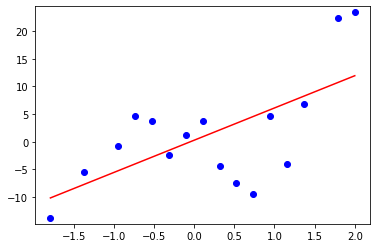

Polynomial degree = 2
Mean squared error: 48.51
R2 score: 0.50


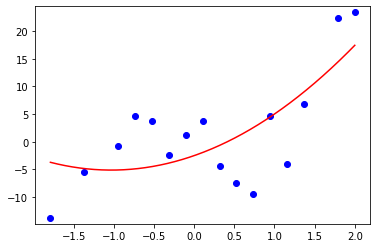

Polynomial degree = 3
Mean squared error: 14.44
R2 score: 0.85


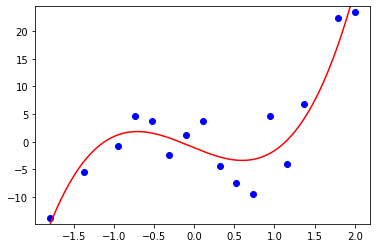

Polynomial degree = 4
Mean squared error: 14.36
R2 score: 0.85


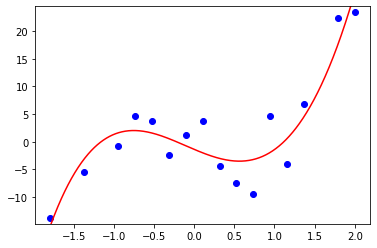

Polynomial degree = 5
Mean squared error: 11.06
R2 score: 0.89


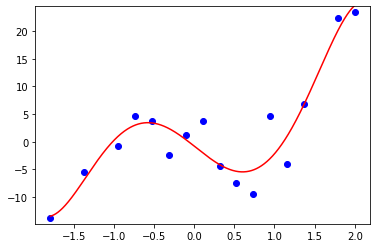

Polynomial degree = 6
Mean squared error: 10.45
R2 score: 0.89


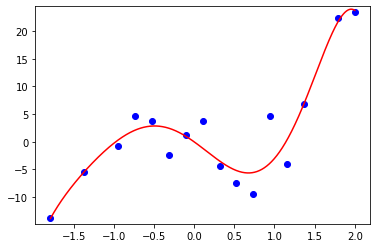

Polynomial degree = 7
Mean squared error: 10.41
R2 score: 0.89


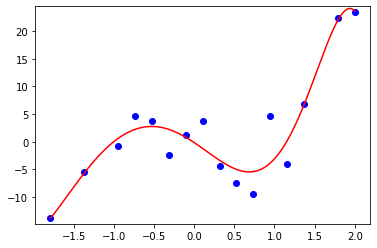

Polynomial degree = 8
Mean squared error: 10.41
R2 score: 0.89


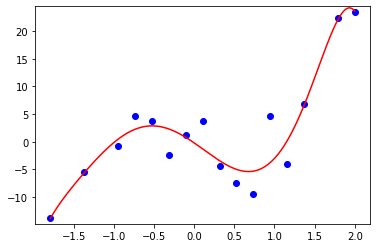

Polynomial degree = 9
Mean squared error: 10.20
R2 score: 0.89


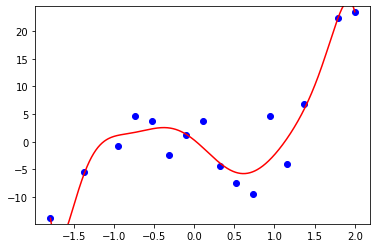

Polynomial degree = 10
Mean squared error: 8.68
R2 score: 0.91


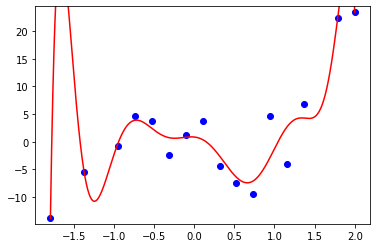

Polynomial degree = 11
Mean squared error: 5.61
R2 score: 0.94


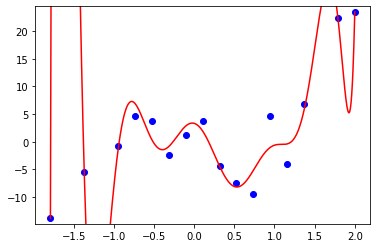

Polynomial degree = 12
Mean squared error: 2.06
R2 score: 0.98


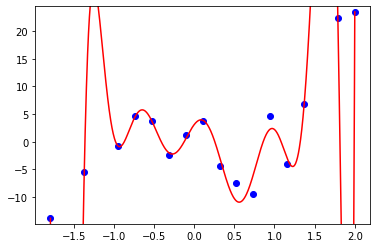

Polynomial degree = 13
Mean squared error: 1.79
R2 score: 0.98


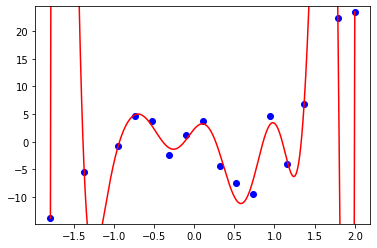

Polynomial degree = 14
Mean squared error: 0.52
R2 score: 0.99


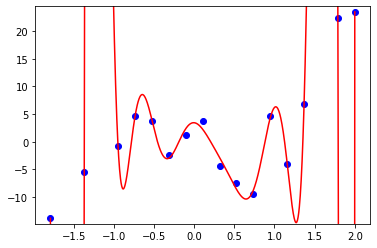

Polynomial degree = 15
Mean squared error: 0.00
R2 score: 1.00


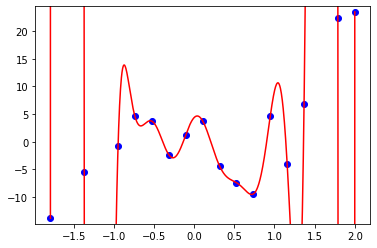

Polynomial degree = 16
Mean squared error: 0.00
R2 score: 1.00


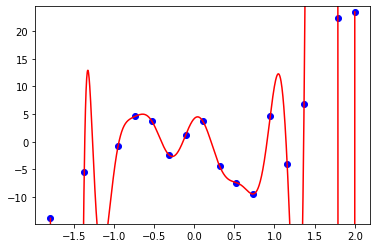

Polynomial degree = 17
Mean squared error: 0.00
R2 score: 1.00


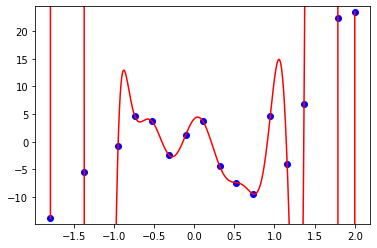

Polynomial degree = 18
Mean squared error: 0.00
R2 score: 1.00


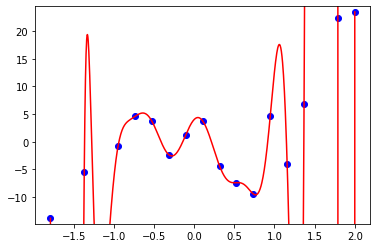

Polynomial degree = 19
Mean squared error: 0.00
R2 score: 1.00


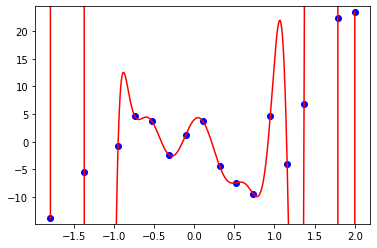

Polynomial degree = 20
Mean squared error: 0.00
R2 score: 1.00


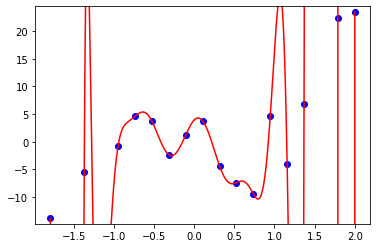

In [7]:
for p in range(1,21):
    regression_visuals(x_train,y_train,p)

Note that the degree 2 polynomial tends to underfit with a large mean squared error on the training data, whereas the degree 3 polynomial seems to be a good fit. The empirical risk decreases as we enlarge the degree, so it predicts the training data well.

Let us now use the test data for polynomials of different degrees to see how well they perform.

Polynomial degree = 1
Mean squared error on test data: 84.86
R2 score: 0.67


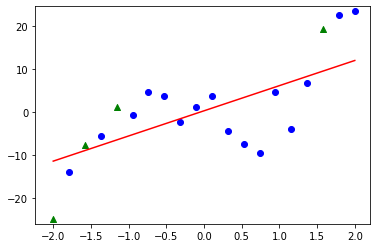

Polynomial degree = 2
Mean squared error on test data: 149.11
R2 score: 0.41


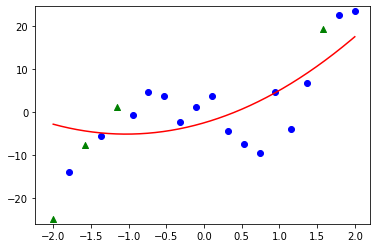

Polynomial degree = 3
Mean squared error on test data: 23.77
R2 score: 0.91


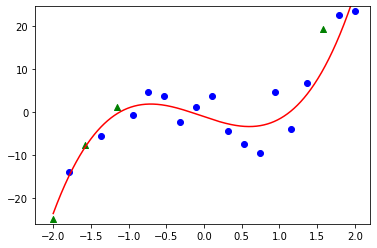

Polynomial degree = 4
Mean squared error on test data: 21.23
R2 score: 0.92


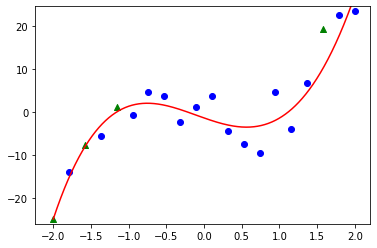

Polynomial degree = 5
Mean squared error on test data: 58.34
R2 score: 0.77


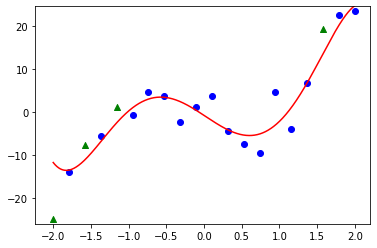

Polynomial degree = 6
Mean squared error on test data: 13.14
R2 score: 0.95


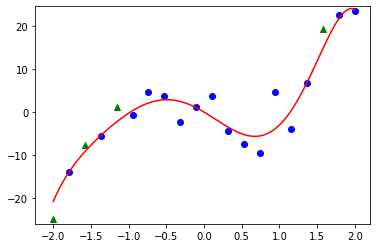

Polynomial degree = 7
Mean squared error on test data: 26.00
R2 score: 0.90


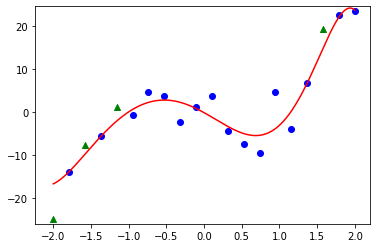

Polynomial degree = 8
Mean squared error on test data: 12.87
R2 score: 0.95


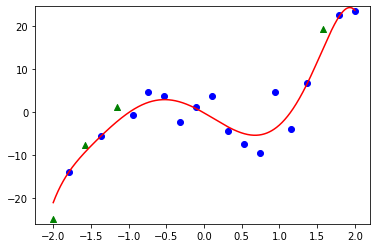

Polynomial degree = 9
Mean squared error on test data: 1731.91
R2 score: -5.82


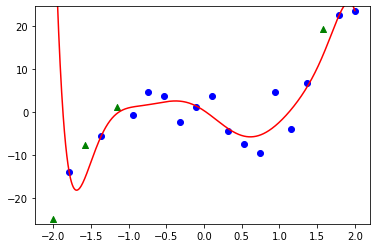

Polynomial degree = 10
Mean squared error on test data: 105753.37
R2 score: -415.47


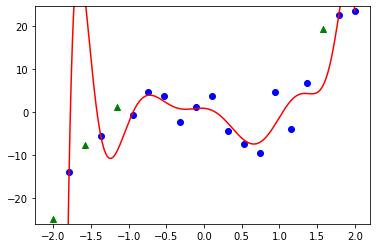

Polynomial degree = 11
Mean squared error on test data: 4944525.69
R2 score: -19471.33


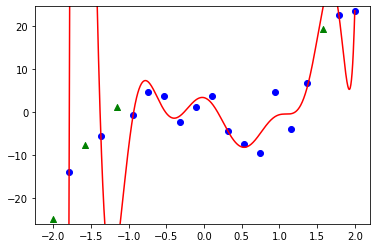

Polynomial degree = 12
Mean squared error on test data: 35617397.03
R2 score: -140265.95


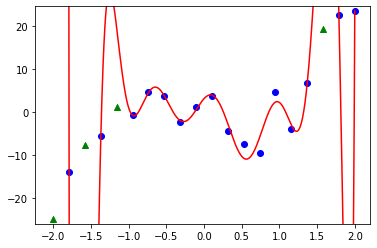

Polynomial degree = 13
Mean squared error on test data: 19702515.06
R2 score: -77590.62


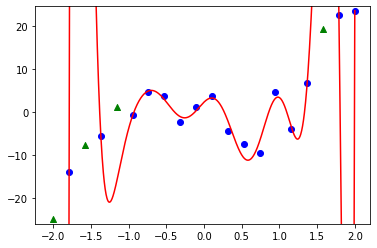

Polynomial degree = 14
Mean squared error on test data: 13967845659.17
R2 score: -55007587.41


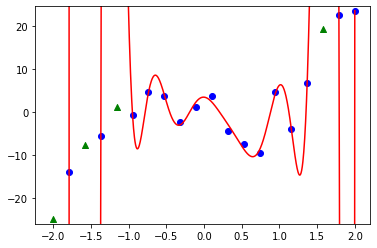

Polynomial degree = 15
Mean squared error on test data: 237078697237.49
R2 score: -933653456.86


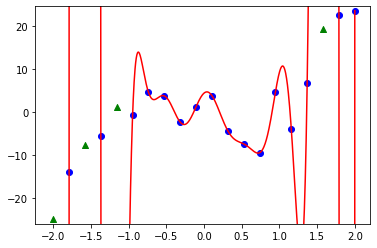

Polynomial degree = 16
Mean squared error on test data: 26184287646.41
R2 score: -103117870.78


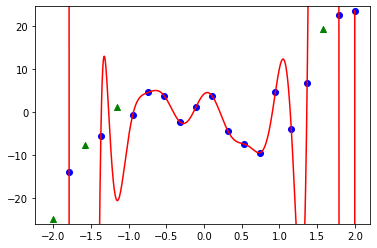

Polynomial degree = 17
Mean squared error on test data: 1863296174837.07
R2 score: -7337955441.36


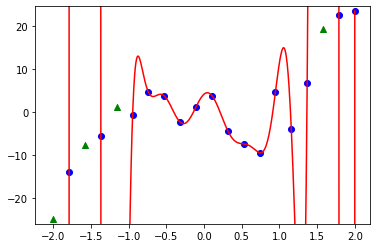

Polynomial degree = 18
Mean squared error on test data: 263306908381.18
R2 score: -1036944306.33


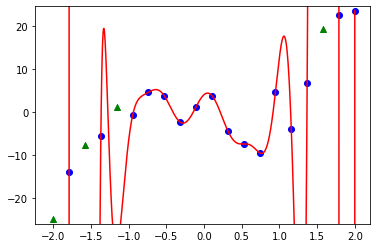

Polynomial degree = 19
Mean squared error on test data: 16866410437013.49
R2 score: -66422595574.95


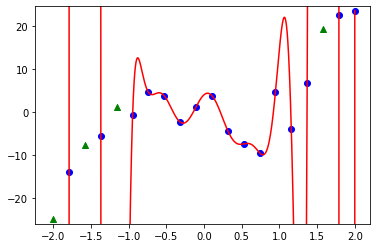

Polynomial degree = 20
Mean squared error on test data: 3087551008225.85
R2 score: -12159264870.76


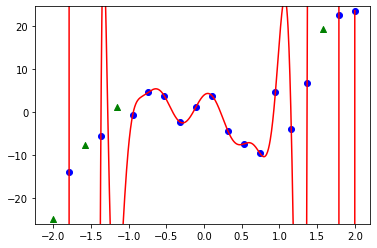

In [9]:
for p in range(1,21):
    print('Polynomial degree =', p)
    print('Mean squared error on test data: {:.2f}'.format(metrics.mean_squared_error(y_test, lin_reg(extend(x_train,p),y_train).predict(extend(x_test,p)))))
    print('R2 score: {:.2f}'.format(metrics.r2_score(y_test, lin_reg(extend(x_train,p),y_train).predict(extend(x_test,p)))))
    
    plt.ylim(min(y)-1,max(y)+1)
    plt.plot(x_train, y_train, 'ob')
    plt.scatter(x_test, y_test, color='green', marker='^')
    a = np.linspace(min(x),max(x),num=1000).reshape(-1,1)
    b = extend(a, p).dot(lin_reg(extend(x_train,p),y_train).coef_.T)
    plt.plot(a,b,'r')
    plt.show()

Our choice of degree in polynomial regression is an example of a **hyperparameter**. A hyperparameter is a property of a learning algorithm, usually having a numerical value, that influences the way the algorithm works. Those values aren’t learned by the algorithm itself from data, and have to be set before running the algorithm.

## Validation

A more accurate estimation of the true risk can be obtained by using some of the training data as a validation set, over which one can evalutate the success of the algorithm’s output predictor. This procedure is called **validation**. In this case, we separate our data set into three distinct sets of labeled examples:

1. training set,
2. validation set,
3. test set.

There’s no optimal proportion to split the dataset into these three subsets. The rule of thumb is to use 70% of the dataset for training, 15% for validation and 15% for testing. However, with big data, it could be reasonable to keep 95% for training and 2.5%/2.5% for validation/testing.

In the next example, let us use a validation set to select the suitable value of our hyperparameter, the degree $n$, in the polynomial regression.

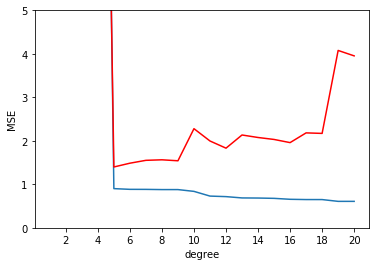

In [12]:
np.random.seed(seed=10)

## Let us create a similar dataset as before with more data points.
x = np.linspace(-2, 2, 100)
y = 4* x ** 5 - 4 * x + np.random.normal(0, 1, 100)
x, y = x[:, np.newaxis] , y[:, np.newaxis]

## To prepare the dataset we first shuffle.
x, y = shuffle(x, y)

## We split the dataset into a training set, validation set, and a test set.
def validation_split(x, y, validation_size=0.15, test_size=0.15):
    n = x.shape[0]
    train_cut = int(np.floor(n * (1 - validation_size - test_size)))
    val_cut = train_cut + int(np.floor(n * validation_size))
    return x[:train_cut, ], x[train_cut:val_cut, ], x[val_cut:, ], y[:train_cut, ], y[train_cut:val_cut, ], y[val_cut:,]

x_train, x_validation, x_test, y_train, y_validation, y_test = validation_split(x, y)


def validation(x_train, x_validation, y_train, y_validation, p): ## Graphs the mean squared error on the training and validation sets for degrees up to n.
    mse_train=[]
    mse_val=[]
    for i in range(1,p+1):
        mse_train.append(metrics.mean_squared_error(y_train, lin_reg(extend(x_train,i),y_train).predict(extend(x_train,i))))
        mse_val.append(metrics.mean_squared_error(y_validation, lin_reg(extend(x_train,i),y_train).predict(extend(x_validation,i))))
    table = np.hstack((np.arange(1, p+1).reshape(-1,1), np.array(mse_train).reshape(-1,1), np.array(mse_val).reshape(-1,1)))
    
    plt.xlabel('degree')
    plt.ylabel('MSE')
    plt.ylim(0,5)     # 10000
    plt.plot(table[:,0], table[:,1])
    plt.plot(table[:,0], table[:,2], 'r')
    plt.xticks(range(2,p+1,2))
    plt.show()
    #print(table)
    
validation(x_train, x_validation, y_train, y_validation, 20)

Which parameter do you choose? Fix it now, and do the testing with that parameter to get an idea about your model.

## Cross-validation

In the cases when we have few training examples or prefer to use more data to train the model, a common technique is to use **cross-validation**.

In **$k$-fold cross-validation** the data is split into a training set and a test set. Then the training set is randomly partitioned into $k$ subsets (folds). For each fold, the algorithm (for a fixed hyperparameter) is trained on the union of the other folds and then the error of its output is estimated using the fold. Finally, the average of all these errors is used to estimate the true error.

The cross-validation method often works well in practice. However, rigorously understanding the exact behaviour of cross-validation is still an open problem.

In the next example, let us utilize a five-fold cross-validation on our data from before, and compare the averages of the mean squared errors for degrees between 1 and 20. Note that the errors tend to increase after a while as we enlarge the degree, which is indicative of overfitting.

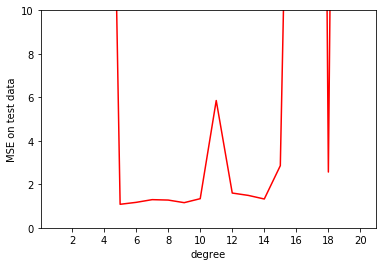

[[  1.         627.42928219]
 [  2.         668.01052718]
 [  3.          36.41610543]
 [  4.          42.4422099 ]
 [  5.           1.08121796]
 [  6.           1.16995933]
 [  7.           1.29464253]
 [  8.           1.27557244]
 [  9.           1.15615377]
 [ 10.           1.33914793]
 [ 11.           5.85335827]
 [ 12.           1.59821   ]
 [ 13.           1.49029689]
 [ 14.           1.32456557]
 [ 15.           2.85703053]
 [ 16.          39.35915803]
 [ 17.          95.88591826]
 [ 18.           2.56390389]
 [ 19.          77.91564961]
 [ 20.         413.14614344]]


In [14]:
###### from sklearn.model_selection import cross_val_score 

x_train, x_test, y_train, y_test = splitting(x, y)

linreg = linear_model.LinearRegression()
mse_crossval=[]
for p in range(1,21):
    mse_crossval.append(-np.mean(cross_val_score(linreg, extend(x_train, p), y_train, cv=5, scoring='neg_mean_squared_error')))
                                        ## Minus sign is due to neg_mean_squared_error: Higher values are better

plt.xlabel('degree')
plt.ylabel('MSE on test data')
plt.ylim(0,10)
plt.plot(np.arange(1, p+1), mse_crossval, 'r')
plt.xticks(range(2,21,2))
plt.show()
print(np.hstack((np.arange(1, 21).reshape(-1,1), np.array(mse_crossval).reshape(-1,1))))

## Testing

We can now use our test set to see how well our polynomial regression algorithm performs for the choice of the degree hyperparameter coming from the cross-validation.

Polynomial regression, validated degree = 5
Mean squared error: 0.880337
R2 score: 1.00


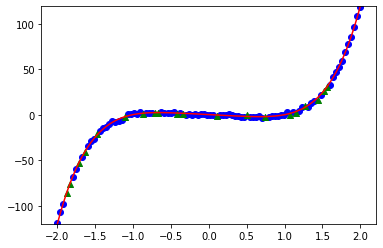

In [15]:
p=5 ## Choice of degree from cross-validation.
print('Polynomial regression, validated degree =', p)
print('Mean squared error: {:2f}'.format(metrics.mean_squared_error(y_test, lin_reg(extend(x_train,p),y_train).predict(extend(x_test,p)))))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_test, lin_reg(extend(x_train,p),y_train).predict(extend(x_test,p)))))

plt.ylim(min(y)-1,max(y)+1)
plt.scatter(x_train, y_train, color='blue', marker='o') ## Training set
plt.scatter(x_test, y_test, color='green', marker='^') ## Test set
a = np.linspace(min(x),max(x),num=100).reshape(-1,1)
b = extend(a, p).dot(lin_reg(extend(x_train,p),y_train).coef_.T)
plt.plot(a,b,'r') ## Regression curve
plt.show()

## Practice yourself!

1. Try to implement polynomial regression by using the normal equation method and the gradient descent method for the translated linear regression problem.
2. How would you apply polynomial regression to a data set where $\mathcal{X} = \mathbb{R}^d$, $d>1$? Try to come up with an algorithm in the case $d=2$ by using a variation of the extend function.
3. Apply the quadratic polynomial regression from Exercise 2 on the Boston house price data set. Compare the number of data points with the number of (new) features. To do higher polynomial regression, select a small number of features you find reasonable to work with and observe how your algorithm performs.